<a href="https://colab.research.google.com/github/caltunay/drivendata_competition-heart_disease_recognition/blob/master/96%25%20Accuracy%20-%20XGB%20-%20Heart_Disease_Prediction_Take_3_XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [0]:
train_val = pd.read_csv('train_values.csv')
train_lab = pd.read_csv('train_labels.csv')

test_val = pd.read_csv('test_values.csv')

In [0]:
train_val

There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.

* **(Categorical)** slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart  

        -- Value 1: upsloping   -- Value 2: flat  -- Value 3: downsloping 
*  **(Categorical)** thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
*resting_blood_pressure (type: int): resting blood pressure
* **(Categorical)**  chest_pain_type (type: int): chest pain type (4 values)
     -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic 
* **(Categorical)** num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy
* **(Categorical)** fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl
* **(Categorical)** resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)
        -- Value 0: normal  -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
*serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl
*oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
* **(Categorical)**  sex (type: binary): 0: female, 1: male
*age (type: int): age in years
*max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)
***(Categorical)** exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)

In [0]:
def slope_type(df):
    
    """Convert slope_of_peak_exercise_st_segment
    column to string/categorical values"""
    
    if df['slope_of_peak_exercise_st_segment'] == 1:
        return 'Upslope'
    
    elif df['slope_of_peak_exercise_st_segment'] == 2:
        return 'Flat'
    
    else: 
        return 'Downslope'

In [0]:
train_val['slope_type'] = train_val.apply(slope_type, axis = 1)

In [0]:
test_val['slope_type'] = test_val.apply(slope_type, axis = 1)

In [0]:
test_val.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,slope_type
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0,Flat
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0,Upslope
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1,Flat
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0,Upslope
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1,Flat


In [0]:
train_val.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,slope_type
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,Upslope
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,Flat
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,Upslope
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,Upslope
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,Downslope


In [0]:
def chest_pain_type(df):
    
    """Convert chest pain
    type to string/categorical values"""
    
   
    if df['chest_pain_type'] == 1:
        return 'typical angina'

    elif df['chest_pain_type'] == 2:
        return 'atypical angina'
    
    elif df['chest_pain_type'] == 3:
        return 'non-anginal angina'
    
    else:
        return 'asymptomatic'

In [0]:
train_val['chest_pain'] = train_val.apply(chest_pain_type, axis = 1)

In [0]:
test_val['chest_pain'] = test_val.apply(chest_pain_type, axis = 1)

In [0]:
def vessel_type(df):

    """Convert major vessels to categorical"""
    
    if df['num_major_vessels'] == 0:
        return 'Color 0'
    elif df['num_major_vessels'] == 1:
        return 'Color 1'
    elif df['num_major_vessels'] == 2:
        return 'Color 2'
    else:
        return 'Color 3'

In [0]:
train_val['vessel_type'] = train_val.apply(vessel_type, axis = 1)

In [0]:
train_val['blood_sugar'] = train_val['fasting_blood_sugar_gt_120_mg_per_dl'].map({1:"Over 120mg", 0:"Under 120mg"})

In [0]:
train_val['ekg'] = train_val['resting_ekg_results'].map({0:'normal', 1: 'abnormality', 2: 'hypertrophy'})

In [0]:
train_val['chest_pain_with_exercise'] = train_val['exercise_induced_angina'].map({0:'None', 1:'Exist'}) 

In [0]:
test_val['vessel_type'] = test_val.apply(vessel_type, axis = 1)

In [0]:
test_val['blood_sugar'] = test_val['fasting_blood_sugar_gt_120_mg_per_dl'].map({1:"Over 120mg", 0:"Under 120mg"})

In [0]:
test_val['ekg'] = test_val['resting_ekg_results'].map({0:'normal', 1: 'abnormality', 2: 'hypertrophy'})

In [0]:
test_val['chest_pain_with_exercise'] = test_val['exercise_induced_angina'].map({0:'None', 1:'Exist'}) 

In [0]:
train_val.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,slope_type,chest_pain,vessel_type,blood_sugar,ekg,chest_pain_with_exercise
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,Upslope,atypical angina,Color 0,Under 120mg,hypertrophy,None
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,Flat,non-anginal angina,Color 0,Under 120mg,normal,None
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,Upslope,asymptomatic,Color 3,Under 120mg,hypertrophy,Exist
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,Upslope,asymptomatic,Color 0,Under 120mg,normal,None
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,Downslope,typical angina,Color 0,Under 120mg,hypertrophy,None


In [0]:
test_val.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,slope_type,chest_pain,vessel_type,blood_sugar,ekg,chest_pain_with_exercise
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0,Flat,typical angina,Color 0,Under 120mg,hypertrophy,None
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0,Upslope,asymptomatic,Color 0,Under 120mg,normal,None
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1,Flat,asymptomatic,Color 0,Under 120mg,hypertrophy,Exist
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0,Upslope,non-anginal angina,Color 1,Under 120mg,normal,None
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1,Flat,asymptomatic,Color 1,Under 120mg,hypertrophy,Exist


In [0]:
drop_cols = 'slope_of_peak_exercise_st_segment chest_pain_type num_major_vessels fasting_blood_sugar_gt_120_mg_per_dl resting_ekg_results exercise_induced_angina'.split()

In [0]:
train_clean = train_val.drop(labels = drop_cols, axis = 1)
train_clean.head()

,patient_id,thal,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,slope_type,chest_pain,vessel_type,blood_sugar,ekg,chest_pain_with_exercise
0,0z64un,normal,128,308,0.0,1,45,170,Upslope,atypical angina,Color 0,Under 120mg,hypertrophy,None
1,ryoo3j,normal,110,214,1.6,0,54,158,Flat,non-anginal angina,Color 0,Under 120mg,normal,None
2,yt1s1x,normal,125,304,0.0,1,77,162,Upslope,asymptomatic,Color 3,Under 120mg,hypertrophy,Exist
3,l2xjde,reversible_defect,152,223,0.0,1,40,181,Upslope,asymptomatic,Color 0,Under 120mg,normal,None
4,oyt4ek,reversible_defect,178,270,4.2,1,59,145,Downslope,typical angina,Color 0,Under 120mg,hypertrophy,None


In [0]:
test_clean = test_val.drop(labels = drop_cols, axis = 1)
test_clean.head()

,patient_id,thal,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,slope_type,chest_pain,vessel_type,blood_sugar,ekg,chest_pain_with_exercise
0,olalu7,reversible_defect,170,288,0.2,1,59,159,Flat,typical angina,Color 0,Under 120mg,hypertrophy,None
1,z9n6mx,normal,138,183,1.4,0,35,182,Upslope,asymptomatic,Color 0,Under 120mg,normal,None
2,5k4413,reversible_defect,120,177,2.5,1,43,120,Flat,asymptomatic,Color 0,Under 120mg,hypertrophy,Exist
3,mrg7q5,normal,102,318,0.0,0,60,160,Upslope,non-anginal angina,Color 1,Under 120mg,normal,None
4,uki4do,normal,138,166,3.6,1,61,125,Flat,asymptomatic,Color 1,Under 120mg,hypertrophy,Exist


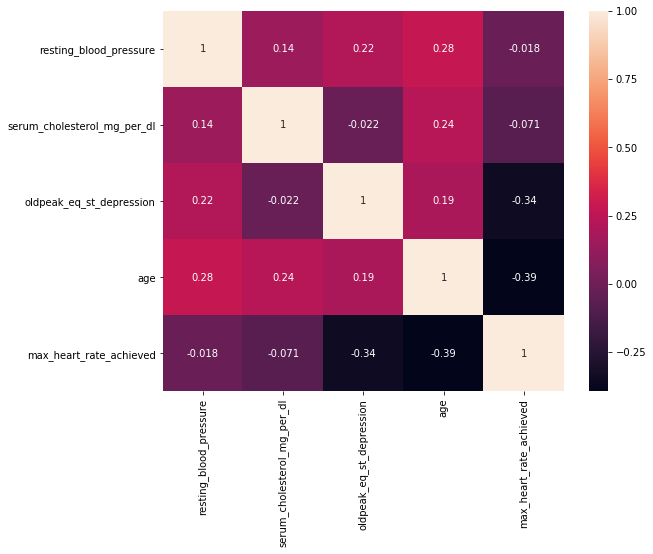

In [0]:
plt.figure(figsize = (9, 7))
sns.heatmap(train_clean.corr(), annot= True)

In [0]:
train_clean['sex'] = train_val['sex'].map({0: 'female', 1: 'male'})
train_clean.head()

,patient_id,thal,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,slope_type,chest_pain,vessel_type,blood_sugar,ekg,chest_pain_with_exercise
0,0z64un,normal,128,308,0.0,male,45,170,Upslope,atypical angina,Color 0,Under 120mg,hypertrophy,None
1,ryoo3j,normal,110,214,1.6,female,54,158,Flat,non-anginal angina,Color 0,Under 120mg,normal,None
2,yt1s1x,normal,125,304,0.0,male,77,162,Upslope,asymptomatic,Color 3,Under 120mg,hypertrophy,Exist
3,l2xjde,reversible_defect,152,223,0.0,male,40,181,Upslope,asymptomatic,Color 0,Under 120mg,normal,None
4,oyt4ek,reversible_defect,178,270,4.2,male,59,145,Downslope,typical angina,Color 0,Under 120mg,hypertrophy,None


In [0]:
test_clean['sex'] = test_val['sex'].map({0: 'female', 1: 'male'})
test_clean.head()

,patient_id,thal,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,slope_type,chest_pain,vessel_type,blood_sugar,ekg,chest_pain_with_exercise
0,olalu7,reversible_defect,170,288,0.2,male,59,159,Flat,typical angina,Color 0,Under 120mg,hypertrophy,None
1,z9n6mx,normal,138,183,1.4,female,35,182,Upslope,asymptomatic,Color 0,Under 120mg,normal,None
2,5k4413,reversible_defect,120,177,2.5,male,43,120,Flat,asymptomatic,Color 0,Under 120mg,hypertrophy,Exist
3,mrg7q5,normal,102,318,0.0,female,60,160,Upslope,non-anginal angina,Color 1,Under 120mg,normal,None
4,uki4do,normal,138,166,3.6,male,61,125,Flat,asymptomatic,Color 1,Under 120mg,hypertrophy,Exist


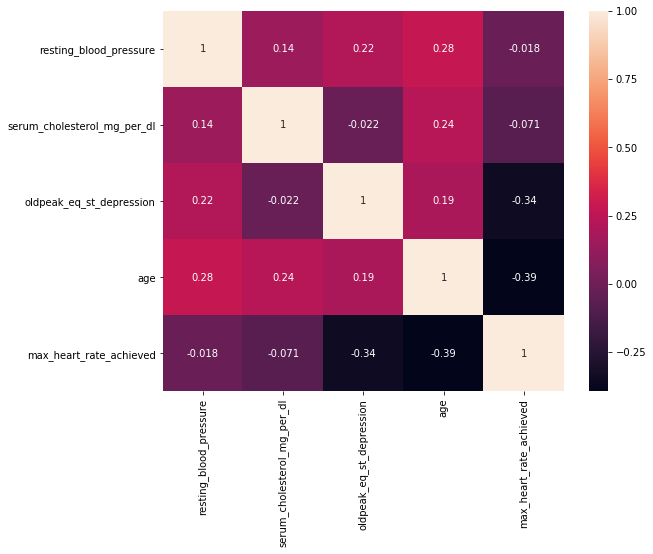

In [0]:
plt.figure(figsize = (9, 7))
sns.heatmap(train_clean.corr(), annot= True)

In [0]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                     180 non-null object
thal                           180 non-null object
resting_blood_pressure         180 non-null int64
serum_cholesterol_mg_per_dl    180 non-null int64
oldpeak_eq_st_depression       180 non-null float64
sex                            180 non-null object
age                            180 non-null int64
max_heart_rate_achieved        180 non-null int64
slope_type                     180 non-null object
chest_pain                     180 non-null object
vessel_type                    180 non-null object
blood_sugar                    180 non-null object
ekg                            180 non-null object
chest_pain_with_exercise       180 non-null object
dtypes: float64(1), int64(4), object(9)
memory usage: 19.8+ KB


In [0]:
obj_cols = ['thal', 'sex', 'slope_type', 'chest_pain', 'vessel_type', 'blood_sugar', 'ekg', 'chest_pain_with_exercise']

train_dummied = pd.get_dummies(data = train_clean, prefix_sep = '|', drop_first = True, columns = obj_cols)

In [0]:
obj_cols = ['thal', 'sex', 'slope_type', 'chest_pain', 'vessel_type', 'blood_sugar', 'ekg', 'chest_pain_with_exercise']

test_dummied = pd.get_dummies(data = test_clean, prefix_sep = '|', drop_first = True, columns = obj_cols)

In [0]:
x_test = test_dummied.drop(labels = 'patient_id', axis = 1)

In [0]:
x_train = train_dummied.drop(labels = 'patient_id', axis = 1)

In [0]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [0]:
x_test_scaled = scaler.transform(x_test)

In [0]:
y_train = train_lab['heart_disease_present'].values
y_train

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0])

In [0]:
parameters_rfc = { 
    'n_estimators': list(range(5,20)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : list(range(2,8)),
    'criterion' :['gini', 'entropy']
}

gs_rfc = GridSearchCV(RandomForestClassifier(random_state = 42), cv = 10, verbose = 0, param_grid = parameters_rfc)
gs_rfc.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={

In [0]:
rfc_opt = gs_rfc.best_estimator_

y_pred = rfc_opt.predict(x_train_scaled)

In [0]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       100
           1       0.93      0.88      0.90        80

    accuracy                           0.92       180
   macro avg       0.92      0.91      0.92       180
weighted avg       0.92      0.92      0.92       180



In [0]:
from xgboost import XGBClassifier

In [0]:
xgb_clf = XGBClassifier(learning_rate=0.02, 
                        objective='binary:logistic', 
                        verbosity = 0, 
                        n_jobs=-1, 
                        random_state = 0)


params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [2, 3, 4, 5],
        'n_estimators': list(range(10,200,20))
}

gs_xgb = GridSearchCV(xgb_clf, 
                      n_jobs = -1, 
                      cv = 10, 
                      verbose = 0, 
                      param_grid = params)

gs_xgb.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.02, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, re...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=0),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5],
                         'max_depth': [2, 3, 4, 5],
     

In [0]:
xgb_opt = gs_xgb.best_estimator_

In [0]:
gs_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.5,
              learning_rate=0.02, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=0)

In [0]:
xgb_pred = xgb_opt.predict(x_train_scaled)

In [0]:
print(classification_report(y_train, xgb_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       100
           1       0.90      0.80      0.85        80

    accuracy                           0.87       180
   macro avg       0.88      0.86      0.87       180
weighted avg       0.87      0.87      0.87       180



In [0]:
xgb_test_pred = xgb_opt.predict_proba(x_test_scaled)


In [0]:
xgb_proba_df = pd.DataFrame(xgb_test_pred)

In [0]:
xgb_final = pd.merge(left = test_val[['patient_id']], right = xgb_proba_df, left_index = True, right_index = True ).set_index('patient_id')
xgb_final = xgb_final.drop(labels = 0, axis = 1)
xgb_final = xgb_final.rename({1:'heart_disease_present'}, axis = 1)
xgb_final.head()

,heart_disease_present
patient_id,
olalu7,0.626897
z9n6mx,0.132480
5k4413,0.878137
mrg7q5,0.188079
uki4do,0.683441


In [0]:
xgb_final.to_csv('Predictions_XGB.csv')

In [0]:
train_clean.head()


,patient_id,thal,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,slope_type,chest_pain,vessel_type,blood_sugar,ekg,chest_pain_with_exercise
0,0z64un,normal,128,308,0.0,male,45,170,Upslope,atypical angina,Color 0,Under 120mg,hypertrophy,None
1,ryoo3j,normal,110,214,1.6,female,54,158,Flat,non-anginal angina,Color 0,Under 120mg,normal,None
2,yt1s1x,normal,125,304,0.0,male,77,162,Upslope,asymptomatic,Color 3,Under 120mg,hypertrophy,Exist
3,l2xjde,reversible_defect,152,223,0.0,male,40,181,Upslope,asymptomatic,Color 0,Under 120mg,normal,None
4,oyt4ek,reversible_defect,178,270,4.2,male,59,145,Downslope,typical angina,Color 0,Under 120mg,hypertrophy,None


In [0]:
# train_clean['oldpeak_eq_st_depression'].describe()[['25%', '50%', '75%']]

train_clean.head()

,patient_id,thal,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,slope_type,chest_pain,vessel_type,blood_sugar,ekg,chest_pain_with_exercise
0,0z64un,normal,128,308,0.0,male,45,170,Upslope,atypical angina,Color 0,Under 120mg,hypertrophy,None
1,ryoo3j,normal,110,214,1.6,female,54,158,Flat,non-anginal angina,Color 0,Under 120mg,normal,None
2,yt1s1x,normal,125,304,0.0,male,77,162,Upslope,asymptomatic,Color 3,Under 120mg,hypertrophy,Exist
3,l2xjde,reversible_defect,152,223,0.0,male,40,181,Upslope,asymptomatic,Color 0,Under 120mg,normal,None
4,oyt4ek,reversible_defect,178,270,4.2,male,59,145,Downslope,typical angina,Color 0,Under 120mg,hypertrophy,None


In [0]:
eq_depression_bin = pd.qcut(x = train_clean['oldpeak_eq_st_depression'], q = 3, labels = ['low', 'mid', 'high'])

In [0]:
train_clean = pd.merge(left = train_clean, right = eq_depression_bin, left_index = True, right_index = True)

In [0]:
train_clean.drop(labels = 'oldpeak_eq_st_depression_x', axis = 1, inplace = True)

In [0]:
train_clean.head()

,patient_id,thal,resting_blood_pressure,serum_cholesterol_mg_per_dl,sex,age,max_heart_rate_achieved,slope_type,chest_pain,vessel_type,blood_sugar,ekg,chest_pain_with_exercise,oldpeak_eq_st_depression_y
0,0z64un,normal,128,308,male,45,170,Upslope,atypical angina,Color 0,Under 120mg,hypertrophy,None,low
1,ryoo3j,normal,110,214,female,54,158,Flat,non-anginal angina,Color 0,Under 120mg,normal,None,high
2,yt1s1x,normal,125,304,male,77,162,Upslope,asymptomatic,Color 3,Under 120mg,hypertrophy,Exist,low
3,l2xjde,reversible_defect,152,223,male,40,181,Upslope,asymptomatic,Color 0,Under 120mg,normal,None,low
4,oyt4ek,reversible_defect,178,270,male,59,145,Downslope,typical angina,Color 0,Under 120mg,hypertrophy,None,high


In [0]:
serum_bin = pd.qcut(x = train_clean['serum_cholesterol_mg_per_dl'], q = 4, labels = ['low', 'mid-low', 'mid-high', 'high'])
train_clean = pd.merge(left = train_clean, right = serum_bin, left_index = True, right_index = True)
train_clean.drop(labels = 'serum_cholesterol_mg_per_dl_x', axis = 1, inplace = True)
train_clean.head()

,patient_id,thal,resting_blood_pressure,sex,age,max_heart_rate_achieved,slope_type,chest_pain,vessel_type,blood_sugar,ekg,chest_pain_with_exercise,oldpeak_eq_st_depression_y,serum_cholesterol_mg_per_dl_y
0,0z64un,normal,128,male,45,170,Upslope,atypical angina,Color 0,Under 120mg,hypertrophy,None,low,high
1,ryoo3j,normal,110,female,54,158,Flat,non-anginal angina,Color 0,Under 120mg,normal,None,high,mid-low
2,yt1s1x,normal,125,male,77,162,Upslope,asymptomatic,Color 3,Under 120mg,hypertrophy,Exist,low,high
3,l2xjde,reversible_defect,152,male,40,181,Upslope,asymptomatic,Color 0,Under 120mg,normal,None,low,mid-low
4,oyt4ek,reversible_defect,178,male,59,145,Downslope,typical angina,Color 0,Under 120mg,hypertrophy,None,high,mid-high


In [0]:
dum = 'thal sex slope_type chest_pain vessel_type blood_sugar ekg chest_pain_with_exercise oldpeak_eq_st_depression_y serum_cholesterol_mg_per_dl_y'.split()

train_dum = pd.get_dummies(data = train_clean, drop_first = True, prefix_sep = '|', columns = dum)

In [0]:
train_dum.head()

,patient_id,resting_blood_pressure,age,max_heart_rate_achieved,thal|normal,thal|reversible_defect,sex|male,slope_type|Flat,slope_type|Upslope,chest_pain|atypical angina,chest_pain|non-anginal angina,chest_pain|typical angina,vessel_type|Color 1,vessel_type|Color 2,vessel_type|Color 3,blood_sugar|Under 120mg,ekg|hypertrophy,ekg|normal,chest_pain_with_exercise|None,oldpeak_eq_st_depression_y|mid,oldpeak_eq_st_depression_y|high,serum_cholesterol_mg_per_dl_y|mid-low,serum_cholesterol_mg_per_dl_y|mid-high,serum_cholesterol_mg_per_dl_y|high
0,0z64un,128,45,170,1,0,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1
1,ryoo3j,110,54,158,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,1,1,0,0
2,yt1s1x,125,77,162,1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1
3,l2xjde,152,40,181,0,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0
4,oyt4ek,178,59,145,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0


In [0]:
ssx = MinMaxScaler()

In [0]:
x_train2 = train_dum.drop(labels = 'patient_id', axis = 1).values
x_train2

array([[128,  45, 170, ...,   0,   0,   1],
       [110,  54, 158, ...,   1,   0,   0],
       [125,  77, 162, ...,   0,   0,   1],
       ...,
       [125,  64, 131, ...,   0,   0,   1],
       [124,  48, 175, ...,   0,   1,   0],
       [160,  54, 163, ...,   0,   0,   0]])

In [0]:

scaled_x_train2 = ssx.fit_transform(x_train2)

In [0]:
y_train2 = train_lab['heart_disease_present'].values
y_train2

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0])

In [0]:
from xgboost import XGBClassifier

In [0]:
xgb_clf2 = XGBClassifier(objective='binary:logistic', 
                        verbosity = 0, 
                        n_jobs=-1, 
                        random_state = 0)


params2 = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [2, 3, 4],
        'n_estimators': list(range(100,300,30)),
        'learning_rate' [0.0001, 0.001, 0.01, 0.1]
}

gs_xgb2 = GridSearchCV(xgb_clf2, 
                      n_jobs = -1, 
                      cv = 10, 
                      verbose = 0, 
                      param_grid = params2)

gs_xgb2.fit(scaled_x_train2, y_train2)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg...
                                     subsample=1, verbosity=0),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5],
                         'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4], 'min_child_weight': [1, 

In [0]:
gs_xgb2.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.5,
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=190, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=0)

In [0]:
xgb_opt2 = gs_xgb2.best_estimator_

In [0]:
y_pred = xgb_opt2.predict(scaled_x_train2)

In [0]:
print(classification_report(y_train2, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       100
           1       0.96      0.95      0.96        80

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180



In [0]:
test_clean.head()

,patient_id,thal,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,slope_type,chest_pain,vessel_type,blood_sugar,ekg,chest_pain_with_exercise
0,olalu7,reversible_defect,170,288,0.2,male,59,159,Flat,typical angina,Color 0,Under 120mg,hypertrophy,None
1,z9n6mx,normal,138,183,1.4,female,35,182,Upslope,asymptomatic,Color 0,Under 120mg,normal,None
2,5k4413,reversible_defect,120,177,2.5,male,43,120,Flat,asymptomatic,Color 0,Under 120mg,hypertrophy,Exist
3,mrg7q5,normal,102,318,0.0,female,60,160,Upslope,non-anginal angina,Color 1,Under 120mg,normal,None
4,uki4do,normal,138,166,3.6,male,61,125,Flat,asymptomatic,Color 1,Under 120mg,hypertrophy,Exist


In [0]:
train_clean.head()

,patient_id,thal,resting_blood_pressure,sex,age,max_heart_rate_achieved,slope_type,chest_pain,vessel_type,blood_sugar,ekg,chest_pain_with_exercise,oldpeak_eq_st_depression_y,serum_cholesterol_mg_per_dl_y
0,0z64un,normal,128,male,45,170,Upslope,atypical angina,Color 0,Under 120mg,hypertrophy,None,low,high
1,ryoo3j,normal,110,female,54,158,Flat,non-anginal angina,Color 0,Under 120mg,normal,None,high,mid-low
2,yt1s1x,normal,125,male,77,162,Upslope,asymptomatic,Color 3,Under 120mg,hypertrophy,Exist,low,high
3,l2xjde,reversible_defect,152,male,40,181,Upslope,asymptomatic,Color 0,Under 120mg,normal,None,low,mid-low
4,oyt4ek,reversible_defect,178,male,59,145,Downslope,typical angina,Color 0,Under 120mg,hypertrophy,None,high,mid-high


In [0]:
# serum_bin = pd.qcut(x = train_clean['serum_cholesterol_mg_per_dl'], q = 4, labels = ['low', 'mid-low', 'mid-high', 'high'])
test_clean = pd.merge(left = train_clean, right = serum_bin, left_index = True, right_index = True)
train_clean.drop(labels = 'serum_cholesterol_mg_per_dl_x', axis = 1, inplace = True)
train_clean.head()

In [0]:
train_val.head()

pd.qcut(x = train_val['serum_cholesterol_mg_per_dl'], q = 4).

0    (281.25, 564.0]
1    (213.75, 245.5]
2    (281.25, 564.0]
3    (213.75, 245.5]
4    (245.5, 281.25]
Name: serum_cholesterol_mg_per_dl, dtype: category
Categories (4, interval[float64]): [(125.999, 213.75] < (213.75, 245.5] < (245.5, 281.25] <
                                    (281.25, 564.0]]

In [0]:
train_val['serum_cholesterol_mg_per_dl'].describe()

count    180.000000
mean     249.211111
std       52.717969
min      126.000000
25%      213.750000
50%      245.500000
75%      281.250000
max      564.000000
Name: serum_cholesterol_mg_per_dl, dtype: float64

In [0]:
ser, bins = pd.qcut(x = train_val['serum_cholesterol_mg_per_dl'], q = 4, retbins = True)

# pd.cut(x = test_val['serum_cholesterol_mg_per_dl'], bins = )

In [0]:
labels2 = ['low', 'mid-low', 'mid-high', 'high']

serum_test_cat = pd.cut(x = test_val['serum_cholesterol_mg_per_dl'], bins = bins, labels = labels2, include_lowest = True)

In [0]:
ser2, bins2 = pd.qcut(x = train_val['oldpeak_eq_st_depression'], q = 3, labels = ['low', 'mid', 'high'], retbins = True)

In [0]:
labels3 = ['low', 'mid', 'high']

st_depre_cat = pd.cut(x = test_val['oldpeak_eq_st_depression'], bins = bins2, labels = labels3, include_lowest = True)

In [0]:
test_clean = pd.merge(left = test_clean, right = serum_test_cat, left_index = True, right_index = True)

In [0]:
test_clean = pd.merge(left = test_clean, right = st_depre_cat, left_index = True, right_index = True)

In [0]:
test_clean.drop(labels = ['serum_cholesterol_mg_per_dl_x', 'oldpeak_eq_st_depression_x'], axis = 1, inplace = True)

In [0]:
test_clean.head()

,patient_id,thal,resting_blood_pressure,sex,age,max_heart_rate_achieved,slope_type,chest_pain,vessel_type,blood_sugar,ekg,chest_pain_with_exercise,serum_cholesterol_mg_per_dl_y,oldpeak_eq_st_depression_y
0,olalu7,reversible_defect,170,male,59,159,Flat,typical angina,Color 0,Under 120mg,hypertrophy,None,high,mid
1,z9n6mx,normal,138,female,35,182,Upslope,asymptomatic,Color 0,Under 120mg,normal,None,low,mid
2,5k4413,reversible_defect,120,male,43,120,Flat,asymptomatic,Color 0,Under 120mg,hypertrophy,Exist,low,high
3,mrg7q5,normal,102,female,60,160,Upslope,non-anginal angina,Color 1,Under 120mg,normal,None,high,low
4,uki4do,normal,138,male,61,125,Flat,asymptomatic,Color 1,Under 120mg,hypertrophy,Exist,low,high


In [0]:
dum2 = 'thal sex slope_type chest_pain vessel_type blood_sugar ekg chest_pain_with_exercise oldpeak_eq_st_depression_y serum_cholesterol_mg_per_dl_y'.split()

test_dum = pd.get_dummies(data = test_clean, drop_first = True, prefix_sep = '|', columns = dum2)
test_dum.head()

,patient_id,resting_blood_pressure,age,max_heart_rate_achieved,thal|normal,thal|reversible_defect,sex|male,slope_type|Flat,slope_type|Upslope,chest_pain|atypical angina,chest_pain|non-anginal angina,chest_pain|typical angina,vessel_type|Color 1,vessel_type|Color 2,vessel_type|Color 3,blood_sugar|Under 120mg,ekg|hypertrophy,ekg|normal,chest_pain_with_exercise|None,oldpeak_eq_st_depression_y|mid,oldpeak_eq_st_depression_y|high,serum_cholesterol_mg_per_dl_y|mid-low,serum_cholesterol_mg_per_dl_y|mid-high,serum_cholesterol_mg_per_dl_y|high
0,olalu7,170,59,159,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,1
1,z9n6mx,138,35,182,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0
2,5k4413,120,43,120,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
3,mrg7q5,102,60,160,1,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1
4,uki4do,138,61,125,1,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0


In [0]:
x_test2 = test_dum.drop(labels = 'patient_id', axis = 1).values
x_test2

array([[170,  59, 159, ...,   0,   0,   1],
       [138,  35, 182, ...,   0,   0,   0],
       [120,  43, 120, ...,   0,   0,   0],
       ...,
       [148,  42, 178, ...,   1,   0,   0],
       [138,  46, 152, ...,   1,   0,   0],
       [150,  43, 171, ...,   0,   1,   0]])

In [0]:
scaled_x_test2 = ssx.transform(x_test2)

In [0]:
scaled_x_test2

array([[0.88372093, 0.625     , 0.59433962, ..., 0.        , 0.        ,
        1.        ],
       [0.51162791, 0.125     , 0.81132075, ..., 0.        , 0.        ,
        0.        ],
       [0.30232558, 0.29166667, 0.22641509, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.62790698, 0.27083333, 0.77358491, ..., 1.        , 0.        ,
        0.        ],
       [0.51162791, 0.35416667, 0.52830189, ..., 1.        , 0.        ,
        0.        ],
       [0.65116279, 0.29166667, 0.70754717, ..., 0.        , 1.        ,
        0.        ]])

In [0]:
xgb_opt_preds = xgb_opt2.predict_proba(scaled_x_test2)

In [0]:
# pd.DataFrame(xgb_opt_preds)

opt_pred = pd.merge(left = test_clean[['patient_id']], right = pd.DataFrame(xgb_opt_preds), left_index = True, right_index = True)
opt_pred

In [0]:
opt_pred.drop(labels = 0, axis = 1, inplace = True)

In [0]:
opt_pred.rename({1:'heart_disease_present'}, axis = 1, inplace = True)
opt_pred.set_index('patient_id', inplace = True)
opt_pred.head()

,heart_disease_present
patient_id,
olalu7,0.948657
z9n6mx,0.005841
5k4413,0.977811
mrg7q5,0.227358
uki4do,0.997536


In [0]:
opt_pred.shape

(90, 1)

In [0]:
opt_pred.to_csv('XGB_Acc_96.csv')

In [0]:
# xgb_clf3 = XGBClassifier(min_child_weight = 1, 
#                          learning_rate=0.2,
#                          objective='binary:logistic', 
#                         verbosity = 0, 
#                         n_jobs=-1, 
#                         random_state = 0,
#                         max_depth = 2)


# params3 = {
#         'gamma': [0.01, 0.1, 0.2],
#         'subsample': [0.75, 0.8, 0.85],
#         'colsample_bytree': [0.01, 0.1, 0.2],
#         'n_estimators': list(range(150,210,20))
# }

# gs_xgb3 = GridSearchCV(xgb_clf3, 
#                       n_jobs = -1, 
#                       cv = 10, 
#                       verbose = 0, 
#                       param_grid = params3)

# gs_xgb3.fit(scaled_x_train2, y_train2)

from sklearn.ensemble import RandomForestClassifier

In [0]:
y_pred3 = gs_xgb3.predict(scaled_x_train2)
print(classification_report(y_train2, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       100
           1       0.95      0.93      0.94        80

    accuracy                           0.94       180
   macro avg       0.94      0.94      0.94       180
weighted avg       0.94      0.94      0.94       180

